## Checkers
A checkers board starts out in the following configuration.

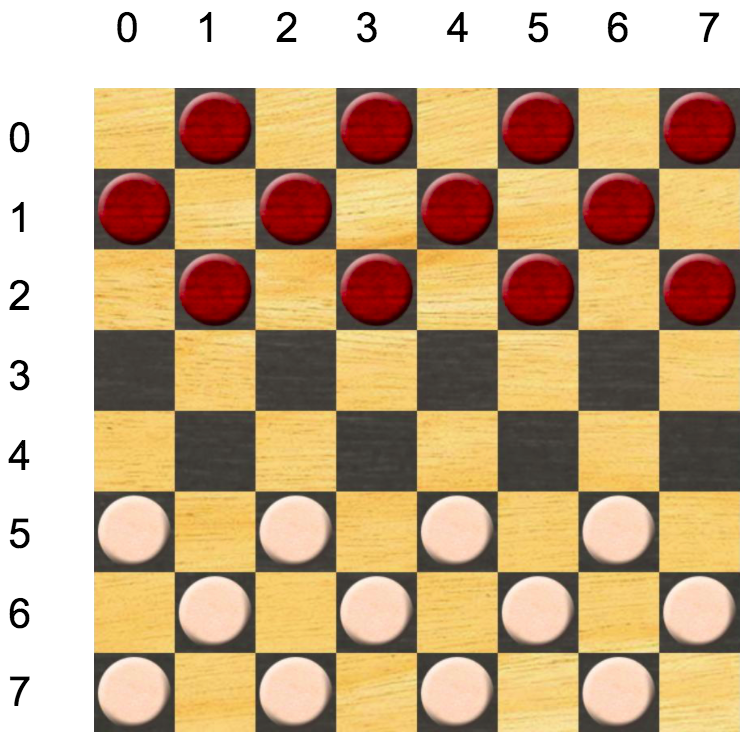

In [ ]:
class CheckersGame () :
    def __init__ (self) :
        self.board = [[0,2,0,2,0,2,0,2],
                      [2,0,2,0,2,0,2,0],
                      [0,2,0,2,0,2,0,2],
                      [0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0],
                      [1,0,1,0,1,0,1,0],
                      [0,1,0,1,0,1,0,1],
                      [1,0,1,0,1,0,1,0]]
        self.whoseMove = 'white'
        self.isWon = 0
        pass
    
    def checkWinner(self) :
        red=0
        white=0
        for i in range(len(self.board)):
            for j in range(len(self.board)):
                if self.board[i][j]==1 or self.board[i][j]==3:
                    white+=1
                if self.board[i][j]==2 or self.board[i][j]==4:
                    red +=1
        if white==0:
            self.isWon = 'red'
        if red==0:
            self.isWon = 'white'
        pass
    
    def changeTurn(self) :
        if self.whoseMove =='white':
            self.whoseMove='red'
        elif self.whoseMove =='red':
            self.whoseMove='white'
        pass
    
    def parseMove (self, move) :
        try:
            moves = tuple(move.split())
        except :
            raise ValueError        
        l = []
        for i in moves:
            l.append(list(i))
        for i in range(len(l)):
            for j in range(len(l[i])):
                try:
                    l[i][j]=int(l[i][j])
                except :
                    raise ValueError
        m=[]
        for i in l:
            i = tuple(i)
            m.append(i)
        moves = tuple(m)
        for i in moves:
            if len(i)>2 or len(i)<2:
                raise ValueError
        numbers = [0,1,2,3,4,5,6,7]
        for i in moves:
            #if self.board[i[0]][i[1]]!=0:
                #print(self.board[i[0]][i[1]],i[0],i[1])
                #raise ValueError
            for j in i:
                if j not in numbers:
                    raise ValueError
        return moves
                    
    def move(self, move) :
        checkers = self.parseMove(move)
        piece = checkers[0]
        final_move = checkers[-1]
        if self.whoseMove == 'white' and self.board[checkers[0][0]][checkers[0][1]]==1:
            for i in checkers[1:]:
                if i[0]==0:
                    self.board[i[0]][i[1]]=3
                else:
                    self.board[final_move[0]][final_move[1]]=1
        elif self.whoseMove == 'white' and self.board[checkers[0][0]][checkers[0][1]]==3:
            self.board[final_move[0]][final_move[1]]=3
        if self.whoseMove == 'red' and self.board[checkers[0][0]][checkers[0][1]]==2:
            for i in checkers[1:]:
                if i[0]==7:
                    self.board[i[0]][i[1]]=4
                else:
                    self.board[final_move[0]][final_move[1]]=2
        elif self.whoseMove == 'red' and self.board[checkers[0][0]][checkers[0][1]]==4:
            self.board[final_move[0]][final_move[1]]=4
        if checkers[0]!=checkers[-1]:
            self.board[piece[0]][piece[1]]=0
        if len(caught)>0:
            for i in caught:
                self.board[i[0]][i[1]]=0
        self.changeTurn()
        self.checkWinner()
            
                
    def isValidMove(self, move) : 
        #if self.isWon!=None:
        checkers = self.parseMove(move) 
        #for i in checkers:
         #   if self.board[i[0]][i[1]]!=0:
          #      print(self.board[i[0]][i[1]],i[0],i[1])
           #     raise ValueError
        global caught
        caught = []
        
        #if checkers[0][0]-checkers[1][0]==2:
         #   if checkers[0][1]-checkers[1][1]==2:
          #      if self.board[checkers[0][0]-1][checkers[0][1]-1] == 2 or self.board[checkers[0][0]-1][checkers[0][1]-1] == 4:
           #             self.board[checkers[0][0]-1][checkers[0][1]-1]==0
            #elif checkers[0][1]-checkers[1][1]=-2:
             #   if self.board[checkers[0][0]-1][checkers[0][1]+1] == 2 or self.board[checkers[0][0]-1][checkers[0][1]+1] == 4:
              #          self.board[checkers[0][0]-1][checkers[0][1]+1]==0
                            
                            #self.board[checkers[i][0]-1][checkers[i][1]-1]==0
            
        if self.whoseMove == 'white':
            n=0
            if self.board[checkers[0][0]][checkers[0][1]]==3:
                n=len(checkers)-1
            elif self.board[checkers[0][0]][checkers[0][1]]==1:
                for i in range(len(checkers)-1):
                    if checkers[i][0]>checkers[i+1][0]:
                        n+=1
            if n==len(checkers)-1:
                    m=0
                    for i in checkers[1:]:
                        if self.board[i[0]][i[1]]==0:
                            m+=1
                    if m==len(checkers)-1:
                        for i in range(len(checkers)-1):
                            if checkers[i][0]-checkers[i+1][0]==2:
                                if checkers[i][1]-checkers[i+1][1]==2:
                                    if self.board[checkers[i][0]-1][checkers[i][1]-1] == 2 or self.board[checkers[i][0]-1][checkers[i][1]-1] == 4:
                                            caught.append((checkers[i][0]-1,checkers[i][1]-1))
                                    else:
                                        return False
                                #self.board[checkers[i][0]-1][checkers[i][1]-1]==0
                                elif checkers[i][1]-checkers[i+1][1]==-2:
                                    if self.board[checkers[i][0]-1][checkers[i][1]+1] == 2 or self.board[checkers[i][0]-1][checkers[i][1]+1] == 4:
                                            caught.append((checkers[i][0]-1,checkers[i][1]+1))
                                    else:
                                        return False
                                elif checkers[i][1]-checkers[i+1][1]<-2 or checkers[i][1]-checkers[i+1][1]>2:
                                    return False
                            elif checkers[i][0]-checkers[i+1][0]>2 or checkers[i][0]-checkers[i+1][0]<-2:
                                return False
                            elif checkers[i][0]-checkers[i+1][0]==1:
                                if checkers[i][1]-checkers[i+1][1]>1 or checkers[i][1]-checkers[i+1][1]<-1:
                                    return False
                            if checkers[i][0]-checkers[i+1][0]==-2:
                                if self.board[checkers[0][0]][checkers[0][1]] == 3:
                                    if checkers[i][1]-checkers[i+1][1]==-2 and self.board[checkers[i][0]+1][checkers[i][1]+1] !=0:
                                        caught.append((checkers[i][0]+1,checkers[i][1]+1))
                                    elif checkers[i][1]-checkers[i+1][1]==2 and self.board[checkers[i][0]+1][checkers[i][1]-1] !=0:
                                        caught.append((checkers[i][0]+1,checkers[i][1]-1))
                        return True
                    else:
                        return False
            else:
                return False
        elif self.whoseMove == 'red':
            n=0
            if self.board[checkers[0][0]][checkers[0][1]]==4:
                n=len(checkers)-1
            elif self.board[checkers[0][0]][checkers[0][1]]==2:
                for i in range(len(checkers)-1):
                    if checkers[i][0]<checkers[i+1][0]:
                        n+=1
            if n==len(checkers)-1:
                    m=0
                    for i in checkers[1:]:
                        if self.board[i[0]][i[1]]==0:
                            m+=1
                        elif i==checkers[0]:
                                m+=1
                    if m==len(checkers)-1:
                        for i in range(len(checkers)-1):
                            if checkers[i][0]-checkers[i+1][0]==-2:
                                if checkers[i][1]-checkers[i+1][1]==2:
                                    if self.board[checkers[i][0]+1][checkers[i][1]-1] == 1 or self.board[checkers[i][0]+1][checkers[i][1]-1] == 3:
                                            caught.append((checkers[i][0]+1,checkers[i][1]-1))
                                    else:
                                        return False
                                #self.board[checkers[i][0]-1][checkers[i][1]-1]==0
                                elif checkers[i][1]-checkers[i+1][1]==-2:
                                    if self.board[checkers[i][0]+1][checkers[i][1]+1] == 1 or self.board[checkers[i][0]+1][checkers[i][1]+1] == 3:
                                            caught.append((checkers[i][0]+1,checkers[i][1]+1))
                                    else:
                                        return False
                                elif checkers[i][1]-checkers[i+1][1]<-2 or checkers[i][1]-checkers[i+1][1]>2:
                                    return False
                            elif checkers[i][0]-checkers[i+1][0]>2 or checkers[i][0]-checkers[i+1][0]<-2:
                                return False
                            elif checkers[i][0]-checkers[i+1][0]==-1:
                                if checkers[i][1]-checkers[i+1][1]>1 or checkers[i][1]-checkers[i+1][1]<-1:
                                    return False
                            if checkers[i][0]-checkers[i+1][0]==2:
                                if self.board[checkers[0][0]][checkers[0][1]] == 4:
                                    if checkers[i][1]-checkers[i+1][1]==-2 and self.board[checkers[i][0]-1][checkers[i][1]+1] !=0:
                                        caught.append((checkers[i][0]-1,checkers[i][1]+1))
                                    elif checkers[i][1]-checkers[i+1][1]==2 and self.board[checkers[i][0]-1][checkers[i][1]-1] !=0:
                                        caught.append((checkers[i][0]-1,checkers[i][1]-1))
                            elif checkers[i][0]-checkers[i+1][0]==-2:
                                if self.board[checkers[0][0]][checkers[0][1]] == 4:
                                    if checkers[i][1]-checkers[i+1][1]==-2 and self.board[checkers[i][0]+1][checkers[i][1]+1] !=0:
                                        caught.append((checkers[i][0]+1,checkers[i][1]+1))
                                    elif checkers[i][1]-checkers[i+1][1]==2 and self.board[checkers[i][0]+1][checkers[i][1]-1] !=0:
                                        caught.append((checkers[i][0]+1,checkers[i][1]-1))
                        return True
                    else:
                        return False
            else:
                return False

####################
    def __str__ (self) :
        out = "  0 1 2 3 4 5 6 7 \n  ╔═╤═╤═╤═╤═╤═╤═╤═╗\n"
        i = 0
        for row in self.board :
            out += f"{str(i)}║"
            j = 0
            for item in row :
                if item == 0:
                    out += "░" if (i + j) % 2 == 0 else " "
                elif item >= 1 and item <= 4:
                    out += ["○", "●", "♔", "♚"][item-1]
                out += "│"
                j += 1
            out = out[:-1]
            out += f"║{str(i)}\n ╟─┼─┼─┼─┼─┼─┼─┼─╢\n"
            i += 1
        out = out[:-18]
        out += "╚═╧═╧═╧═╧═╧═╧═╧═╝\n  0 1 2 3 4 5 6 7 \n"
        return out
    
def runGame (init = False, moveList = False) :
    game = CheckersGame()

    if (init != False) :
        game.board = init
    
    print("Checkers Initialized...")
    print(game)
    if (moveList != False) :
        print("Move List Detected, executing moves")
        for move in moveList :
            print(f"{game.whoseMove} makes move {move}\n")
            if (move == "q") :
                return
            if (game.isValidMove(move)) :
                game.move(move)
                print(game)
                if (game.isWon != 0) :
                    break
            else :
                print("Invalid Move")    
                
    print("Moves must be typed as coordinates (with no commas or brackets) separated by spaces. Row, then column.")
    print("Example: 54 43")
    print("When performing multiple jumps, enter each co-ordinate your piece will land on in sequence.")
    while (game.isWon == False) :
        print(f"{game.whoseMove} to move")
        move = input(">> ")
        if (move == "q") :
            return
        if (game.isValidMove(move)) :
            game.move(move)
            print(game)
            if (game.isWon != 0) :
                break
        else :
            print("Invalid Move")
    print("The Game is Finished!")
    print(f"Congratulations, {game.isWon}!")

#raise NotImplementedError()

In [2]:
game = CheckersGame()
print("`parseMove()` Test Cases")
print(game.parseMove("12 34") == ((1, 2), (3, 4)))
print(game.parseMove("77 66 55 44 33 22 11 00") == ((7, 7), (6, 6), (5, 5), (4, 4), (3, 3), (2, 2), (1, 1), (0, 0)))
game.changeTurn()
print("`changeTurn()` test cases")
print(game.whoseMove == "red")
game.changeTurn()
print(game.whoseMove == "white")
print("`checkWinner()` test cases") 
game.board  = [ [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 1, 0, 1, 0, 0, 0, 1, 0 ]
              , [ 0, 1, 0, 1, 0, 1, 0, 1 ]
              , [ 1, 0, 1, 0, 1, 0, 1, 0 ]
              ]  
game.checkWinner()
print(game.isWon == "white")
game.board  = [ [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 4, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              ]  
game.checkWinner()
print(game.isWon == "red")

`parseMove()` Test Cases
True
True
`changeTurn()` test cases
True
True
`checkWinner()` test cases
True
True


In [ ]:
# Here are some example commands you might use, testing a jump and a triple jump.
# 63 45
# 65 43 25 03
test_board  = [ [ 0, 2, 0, 0, 0, 2, 0, 2 ]
              , [ 2, 0, 2, 0, 2, 0, 2, 0 ]
              , [ 0, 2, 0, 2, 0, 0, 0, 2 ]
              , [ 0, 0, 0, 0, 2, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 1, 0, 1, 0, 2, 0, 1, 0 ]
              , [ 0, 1, 0, 1, 0, 1, 0, 1 ]
              , [ 1, 0, 1, 0, 1, 0, 1, 0 ]
              ]   

test_boar2  = [ [ 0, 2, 0, 0, 0, 2, 0, 2 ]
              , [ 2, 0, 2, 0, 2, 0, 2, 0 ]
              , [ 0, 2, 0, 0, 0, 0, 0, 2 ]
              , [ 0, 0, 2, 0, 2, 0, 0, 0 ]
              , [ 0, 0, 0, 1, 0, 1, 0, 0 ]
              , [ 1, 0, 0, 0, 0, 0, 1, 0 ]
              , [ 0, 1, 0, 0, 0, 1, 0, 1 ]
              , [ 1, 0, 1, 0, 1, 0, 1, 0 ]
              ] 

runGame(test_boar2)

Checkers Initialized...
  0 1 2 3 4 5 6 7 
  ╔═╤═╤═╤═╤═╤═╤═╤═╗
0║░│●│░│ │░│●│░│●║0
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
1║●│░│●│░│●│░│●│░║1
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
2║░│●│░│ │░│ │░│●║2
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
3║ │░│●│░│●│░│ │░║3
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
4║░│ │░│○│░│○│░│ ║4
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
5║○│░│ │░│ │░│○│░║5
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
6║░│○│░│ │░│○│░│○║6
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
7║○│░│○│░│○│░│○│░║7
 ╚═╧═╧═╧═╧═╧═╧═╧═╝
  0 1 2 3 4 5 6 7 

Moves must be typed as coordinates (with no commas or brackets) separated by spaces. Row, then column.
Example: 54 43
When performing multiple jumps, enter each co-ordinate your piece will land on in sequence.
white to move
>> 43 25
  0 1 2 3 4 5 6 7 
  ╔═╤═╤═╤═╤═╤═╤═╤═╗
0║░│●│░│ │░│●│░│●║0
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
1║●│░│●│░│●│░│●│░║1
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
2║░│●│░│ │░│○│░│●║2
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
3║ │░│●│░│ │░│ │░║3
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
4║░│ │░│ │░│○│░│ ║4
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
5║○│░│ │░│ │░│○│░║5
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
6║░│○│░│ │░│○│░│○║6
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
7║○│░│○│░│○│░│○│░║7
 ╚═╧═╧═╧═╧═╧═╧═╧═╝
  0 1 2 3 4 5 6 7 

r

In [5]:
# The following is an entire game of checkers, which tests various edge cases.  
# There are some invalid commands in this one as well.  
# If your code works on this one, it'll probably do fine on the test cases.
# The test cases have not been selected from this game, so I can't say 100%
# But this is an extremely strong test of robustness.  

# The full output for this (to compare to your result) has been stored in "checkersgame.txt"

# You can run this game up to a certain move number by slicing the list of moves...

moves = [ '50 41'
, '23 32'
, '41 23'
, '12 34'
, '52 41'
, '21 32'
, '41 30'
, '41 52'
, '34 43'
, '56 47'
, '43 52'
, '61 43 21' # double jump
, '10 32'
, '30 21'
, '25 36'
, '21 10'
, '01 13'
, '01 12'
, '10 01'
, '14 25'
, '01 23 41' # w.king double jumps backward
, '41 32'
, '25 34'
, '41 32'
, '34 43'
, '32 21'
, '43 52'
, '72 61'
, '05 14'
, '61 50'
, '52 43'
, '52 61'
, '54 43'
, '61 72' # red gets kinged 
, '70 61'
, '36 47'
, '36 45'
, '50 41'
, '72 50 32 54 72' # round the world! Red king jumps 4, lands back in the place he started.  
, '65 54'
, '16 25'
, '21 12'
, '14 23'
, '54 36 14 32' # This is an invalid move, the final jump is backwards and therefore disallowed.  
, '54 36 14' # This is fine though.
, '72 63'
, '74 52'
, '07 16'
, '14 05'
, '27 36'
, '05 27 45'
, '03 14'
, '76 65'
, '14 25'
, '12 34 61'
, '12 34 16'
]
runGame(moveList = moves)

Checkers Initialized...
  0 1 2 3 4 5 6 7 
  ╔═╤═╤═╤═╤═╤═╤═╤═╗
0║░│●│░│●│░│●│░│●║0
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
1║●│░│●│░│●│░│●│░║1
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
2║░│●│░│●│░│●│░│●║2
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
3║ │░│ │░│ │░│ │░║3
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
4║░│ │░│ │░│ │░│ ║4
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
5║○│░│○│░│○│░│○│░║5
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
6║░│○│░│○│░│○│░│○║6
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
7║○│░│○│░│○│░│○│░║7
 ╚═╧═╧═╧═╧═╧═╧═╧═╝
  0 1 2 3 4 5 6 7 

Move List Detected, executing moves
white makes move 50 41

  0 1 2 3 4 5 6 7 
  ╔═╤═╤═╤═╤═╤═╤═╤═╗
0║░│●│░│●│░│●│░│●║0
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
1║●│░│●│░│●│░│●│░║1
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
2║░│●│░│●│░│●│░│●║2
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
3║ │░│ │░│ │░│ │░║3
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
4║░│○│░│ │░│ │░│ ║4
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
5║ │░│○│░│○│░│○│░║5
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
6║░│○│░│○│░│○│░│○║6
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
7║○│░│○│░│○│░│○│░║7
 ╚═╧═╧═╧═╧═╧═╧═╧═╝
  0 1 2 3 4 5 6 7 

red makes move 23 32

  0 1 2 3 4 5 6 7 
  ╔═╤═╤═╤═╤═╤═╤═╤═╗
0║░│●│░│●│░│●│░│●║0
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
1║●│░│●│░│●│░│●│░║1
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
2║░│●│░│ │░│●│░│●║2
 ╟─┼─┼─┼─┼─┼─┼─

# Sudoku

In [1]:
def instantiateCases () :
    # Correctly Formulated Sudoku
    global s 
    s = [[0,0,7, 0,0,0, 0,1,5],
         [0,0,0, 3,9,7, 0,0,0],
         [0,6,2, 0,1,0, 4,0,9], 
         [0,2,0, 0,0,1, 5,4,3],
         [7,0,0, 4,0,9, 0,0,1],
         [4,8,1, 2,0,0, 0,6,0],
         [9,0,6, 0,2,0, 7,3,0],
         [0,0,0, 9,8,4, 0,0,0],
         [1,5,0, 0,0,0, 2,0,0]
        ]    
    # Unsolvable Sudoku (Information Missing)
    global s2 
    s2= [[0,0,0, 0,0,0, 0,1,5],
         [0,0,0, 3,9,7, 0,0,0],
         [0,0,0, 0,1,0, 4,0,9],
         [0,0,0, 0,0,1, 5,4,3],
         [0,0,0, 4,0,9, 0,0,1],
         [0,0,0, 2,0,0, 0,6,0],
         [0,0,0, 0,2,0, 7,3,0],
         [0,0,0, 9,8,4, 0,0,0],
         [0,0,0, 0,0,0, 2,0,0]
        ]
    # Solved Sudoku
    global s3 
    s3= [[8,9,7, 6,4,2, 3,1,5],
         [5,1,4, 3,9,7, 6,8,2],
         [3,6,2, 5,1,8, 4,7,9],
         [6,2,9, 8,7,1, 5,4,3],
         [7,3,5, 4,6,9, 8,2,1],
         [4,8,1, 2,5,3, 9,6,7],
         [9,4,6, 1,2,5, 7,3,8],
         [2,7,3, 9,8,4, 1,5,6],
         [1,5,8, 7,3,6, 2,9,4]]
    # Invalid Sudoku (Does not follow Rules of Sudoku
    global s4 
    s4= [[0,0,7, 0,0,0, 0,1,5],
         [0,0,0, 3,9,7, 0,0,0],
         [0,6,2, 0,1,0, 4,0,9], 
         [0,2,0, 0,0,1, 5,4,3],
         [7,0,0, 4,0,9, 0,0,1],
         [4,8,1, 2,0,0, 0,6,0],
         [9,0,6, 5,2,0, 7,3,0],
         [0,0,0, 9,8,4, 0,0,0],
         [1,3,6, 0,0,0, 2,0,0]
        ]
    # s after one full application of elimination
    global s5 
    s5=[[0,0,7, 0,0,0, 0,1,5],
        [0,0,0, 3,9,7, 0,0,0],
        [0,6,2, 0,1,0, 4,0,9],
        [6,2,9, 0,7,1, 5,4,3],
        [7,3,5, 4,6,9, 8,2,1],
        [4,8,1, 2,0,0, 9,6,7],
        [9,4,6, 0,2,5, 7,3,8],
        [0,7,3, 9,8,4, 0,5,6],
        [1,5,8, 0,3,6, 2,9,4]]
    # Medium Difficulty Sudoku, unsolvable by elimination method alone
    global m
    m =[[1,0,0, 9,0,8, 3,6,0],
        [0,0,5, 3,0,0, 4,0,0],
        [8,0,0, 6,5,0, 0,0,0],
        [0,0,0, 0,0,3, 0,9,2],
        [0,0,3, 0,0,0, 1,0,0],
        [5,6,0, 1,0,0, 0,0,0],
        [0,0,0, 0,7,6, 0,0,3],
        [0,0,6, 0,0,0, 2,0,0],
        [0,8,4, 2,0,5, 0,0,7]]
    # Super Difficult Sudoku, unsolvable by elimination method and requiring advanced techniques
    global h
    h =[[0,0,0, 0,0,0, 0,3,0],
        [6,0,5, 0,0,0, 0,0,0],
        [0,3,0, 0,1,0, 9,0,0],
        [5,7,0, 6,0,0, 0,0,0],
        [0,9,0, 0,0,0, 0,1,0],
        [0,0,0, 0,0,8, 0,2,4],
        [0,0,1, 0,7,0, 0,4,0],
        [0,0,0, 0,0,0, 5,0,8],
        [0,2,0, 0,0,0, 0,0,0]]
        # Correctly Formulated Sudoku
    global s6
    s6= [[0,0,7, 0,0,0, 0,1,5],
         [0,0,0, 3,9,7, 0,8,0],
         [0,6,2, 0,1,8, 4,0,9], 
         [0,2,0, 0,0,1, 5,4,3],
         [7,0,0, 4,0,9, 0,0,1],
         [4,8,1, 2,0,0, 0,6,0],
         [9,0,6, 0,2,0, 7,3,0],
         [0,0,0, 9,8,4, 0,0,0],
         [1,5,0, 0,0,0, 2,0,0]
        ]    

In [2]:
def solved(s) :
    for i in range(len(s)):
        for j in range(len(s[i])):
            if s[i][j]==0:
                return False
    return True

def horizontalCheck(x, val, s) :
    for i in s[x]:
        if i == val:
            return False
    return True

def verticalCheck(y, val, s) :
    for i in s:
        if i[y] == val:
            return False
    return True

def subSquareCheck(x,y,val,s) :
    #first_subsquare = [1,2,3]
    #second_subsquare = [4,5,6]
    #third_subsquare = [7,8,9]
    
    if x in [1,2,3] and y in [1,2,3]:
        for i in [0,1,2]:
            for j in [0,1,2]:
                #print(s[j][i])
                if s[j][i] == val:
                    return False
    elif x in [1,2,3] and y in [4,5,6]:
        for i in [0,1,2]:
            for j in [3,4,5]:
                #print(s[j][i])
                if s[j][i] == val:
                    return False
    elif x in [1,2,3] and y in [7,8,9]:
        for i in [0,1,2]:
            for j in [6,7,8]:
                #print(s[j][i])
                if s[j][i] == val:
                    return False
    elif x in [4,5,6] and y in [1,2,3]:
        for i in [3,4,5]:
            for j in [0,1,2]:
                #print(s[j][i])
                if s[j][i] == val:
                    return False
    elif x in [4,5,6] and y in [4,5,6]:
        for i in [3,4,5]:
            for j in [3,4,5]:
                #print(s[j][i])
                if s[j][i] == val:
                    return False
    elif x in [4,5,6] and y in [7,8,9]:
        for i in [3,4,5]:
            for j in [6,7,8]:
                #print(s[j][i])
                if s[j][i] == val:
                    return False
    elif x in [7,8,9] and y in [1,2,3]:
        for i in [6,7,8]:
            for j in [0,1,2]:
                #print(s[j][i])
                if s[j][i] == val:
                    return False    
    elif x in [7,8,9] and y in [4,5,6]:
        for i in [6,7,8]:
            for j in [3,4,5]:
                #print(s[j][i])
                if s[j][i] == val:
                    return False
    elif x in [7,8,9] and y in [7,8,9]:
        for i in [6,7,8]:
            for j in [6,7,8]:
                #print(s[j][i])
                if s[j][i] == val:
                    return False
    return True

def elimination (x, y, s) :
    if solved(s)==True:
        raise Exception('Sudoku Invalid')
    else:
        values = []
        numbers = range(10)
        for i in numbers:
            if horizontalCheck(y, i, s)==True:
                values.append(i)
        #print(values)
        for i in numbers:
            if verticalCheck(x, i, s)==False and i in values:
                values.remove(i)
        #print(values)
        for i in numbers:
            if subSquareCheck(x+1,y+1,i,s)==False and i in values:
                values.remove(i)
        #print(values)
        if len(values)==1:
            for i in values:
                return i
        elif len(values)>1:
            return 0
        else:
            raise Exception('Sudoku Invalid')
            
def applyStrategy(strategy, s) :
    #global old_s
    old_s = s
    try:
        if 0 not in s[0]:
            x = strategy(0, 0, s)
    except:
        return False
    for i in range(len(s)):
        for j in range(len(s)):
            if old_s[i][j] == 0:
                n=0
                try:
                    x = strategy (j, i, old_s)
                    #print(i,j, x, s[i][j])
                    s[i][j]=x
                    if x!=0:
                        n+=1
                except:
                    return False
    if n>0:
        return True
    else:
        return False
    
def sudokuSolver (s, strategies) :
    if solved(s)== True:
        return s
    aaa = True
    for i in strategies:
        n = 0
        while aaa==True:
            applyStrategy(i,s)
            if solved(s)==True:
                return s
            elif applyStrategy(i,s)== False:
                aaa = False
    raise Exception("Sudoku Unsolvable")

# Blackjack
##### A program that draws cards from a deck, and simulates a game of blackjack.

In [3]:
class Card:
    
    def __init__(self, suit, face):
        
        pass 
        
    def value(self):
        '''
        Returns the value of the card as an integer.
        For Aces, return 1.
        '''
        
        pass 
    
class Deck:
    
    def __init__(self):
        pass
            
    def draw(self):
        """
        Returns the card at the top of the deck, and removes it from the deck
        """
    
        pass
    def shuffle(self):
        """
        Shuffle the remaining cards in the deck.
        """
        pass
    
    def reshuffle(self):
        """
        Put all the cards back in the deck, and shuffle it.
        """
        pass


In [4]:
d = Deck()
card = d.draw()
print(card.suit)
print(card.face)
print(card.value()) 

d.shuffle()
card = d.draw()
print(card.suit)
print(card.face)
print(card.value())

AttributeError: 'NoneType' object has no attribute 'suit'

In [5]:
def value(hand):
    
    val = 0
    num_aces = 0
    
    for card in hand:
        this_val = card.value()
        
        if this_val != 1:
            val += this_val
        else:
            num_aces += 1
    
    while num_aces > 0:
        
        if val + 11 > 21:
            val += 1
        else:
            val += 11
            
        num_aces -= 1
    
    return val

# Wizard Wars

##### Implementing elements of the spellcasting system from a popular tabel-top roleplaying game.

In [ ]:
class InsufficientSpells(Exception):
    pass

class SpellSlots():
    def __init__(self, wizard_level):
        self.wizard_level = wizard_level
        if wizard_level == 1:
            self.max = [2,0,0]
        elif wizard_level == 2:
            self.max = [3,0,0]
        elif wizard_level == 3:
            self.max = [4,2,0]
        elif wizard_level == 4:
            self.max = [4,3,0]
        elif wizard_level == 5:
            self.max = [4,3,2]
        self.current= self.max
    def isCastable(self, spell_level):
        if self.current[spell_level-1] != 0:
            return True
        else:
            return False
    def cast(self, spell_level):
        if self.current[spell_level-1] != 0:
            self.current[spell_level-1] -=1
        else:
            raise InsufficientSpells
            
class Spell():
    def __init__(self, name, level, school, casting_time, description):
        self.name = name
        self.level = level
        self.school = school
        self.casting_time = casting_time
        self.description = description
    def cast(self, target):
        print (self.name+'\n'+str(self.level)+'\n'+self.school+'\n'+self.casting_time+'\n'+self.description+'\n'+'\n')
    def __str__(self):
        string = ('{}\n'
            '{}\n'
            '{}\n'
            '{}\n'
            '{}\n'
            '\n'.format(self.name,self.level,self.school,self.casting_time, self.description))
        return string
        
class HealingSpell(Spell):
    def __init__(self, name, level, school, casting_time, description, heal):
        super().__init__(name, level, school, casting_time, description)
        self.heal = heal
    def cast(self, target):
        Spell.cast(self,target)
        target.hp+=self.heal
        
class HarmingSpell(Spell):
    def __init__(self, name, level, school, casting_time, description, hurt):
        super().__init__(name, level, school, casting_time, description)
        self.hurt = hurt
    def cast(self, target):
        Spell.cast(self,target)
        target.hp-=self.hurt

In [ ]:
spellA = Spell("Healing Word", 1, "Evocation", "1 bonus action", "A creature of your choice that you can see within range regains hit points equal to 1d4 + your spellcasting modifier.  This spell has no effect on undead or constructs.")

spellA.cast(None)

In [ ]:
class InsufficientSpells(Exception):
    pass

class SpellSlots():
    def __init__(self, wizard_level):
        self.wizard_level = wizard_level
        if wizard_level == 1:
            self.max = [2,0,0]
        elif wizard_level == 2:
            self.max = [3,0,0]
        elif wizard_level == 3:
            self.max = [4,2,0]
        elif wizard_level == 4:
            self.max = [4,3,0]
        elif wizard_level == 5:
            self.max = [4,3,2]
        self.current = self.max
    def isCastable(self, spell_level):
        if self.current[spell_level-1] != 0:
            return True
        else:
            return False
    def cast(self, spell_level):
        if self.current[spell_level-1] != 0:
            self.current[spell_level-1] -=1
        else:
            raise InsufficientSpells

class Spell():
    def __init__(self, name, level, school, casting_time, description):
        self.name = name
        self.level = level
        self.school = school
        self.casting_time = casting_time
        self.description = description
    def cast(self, target):
        print (self.name+'\n'+str(self.level)+'\n'+self.school+'\n'+self.casting_time+'\n'+self.description+'\n'+'\n')
    def __str__(self):
        string = ('{}\n'
            '{}\n'
            '{}\n'
            '{}\n'
            '{}\n'
            '\n'.format(self.name,self.level,self.school,self.casting_time, self.description))
        return string
        
class HealingSpell(Spell):
    def __init__(self, name, level, school, casting_time, description, heal):
        super().__init__(name, level, school, casting_time, description)
        self.heal = heal
    def cast(self, target):
        Spell.cast(self,target)
        target.hp+=self.heal
        
class HarmingSpell(Spell):
    def __init__(self, name, level, school, casting_time, description, hurt):
        super().__init__(name, level, school, casting_time, description)
        self.hurt = hurt
    def cast(self, target):
        Spell.cast(self,target)
        target.hp-=self.hurt

class Wizard():
    def __init__(self, wizard_level):
        self.wizard_level = wizard_level 
        self.spellList = []
        self.hp = 6*self.wizard_level
        self.level = 0
        self.spellSlots = SpellSlots(wizard_level)
        self.original_spellSlots = SpellSlots(wizard_level)
    def cast(self, spell_name, target):
        for i in self.spellList:
            if spell_name == i.name:
                if self.spellSlots.current[i.level-1] != 0:
                    self.spellSlots.current[i.level-1] -=1
                    i.cast(target)
                else:
                    raise InsufficientSpells
            else:
                pass
    def longRest(self):
        self.spellSlots = self.original_spellSlots
        self.hp = 6*self.wizard_level

In [ ]:
spellA = HealingSpell("Healing Word", 1, "Evocation", "1 bonus action", "A creature of your choice that you can see within range regains hit points equal to 1d4 + your spellcasting modifier.  This spell has no effect on undead or constructs.", 5)
spellB = HarmingSpell("Inflict Wounds", 1, "Necromancy", "1 action", "Make a melee spell attack against a creature you can reach.  On a hit, the target takes 3d10 necrotic damage", 15)
spellC = Spell("Dispel Magic", 3, "Abjuration", "1 action", "Choose one creature, object, or magical effect within range.  Any spell of 3rd level or lower on the target ends.  For each spell of 4th level or higher on the target, make an ability check using your spellcasting ability.  The DC equals 10 + the spell's level.  On a successful check, the spell ends.")

Merlin = Wizard(5)
Merlin.spellList = [ spellA, spellB, spellC ]

Gandalf = Wizard(3) 
Gandalf.spellList = [spellA, spellB]

print("Merlin -> ", Merlin.hp)
print("Merlin's spell slots : ", Merlin.spellSlots.current)
print("Gandalf -> ", Gandalf.hp)
print("Gandalf's spell slots : ", Gandalf.spellSlots.current)

Merlin.cast("Inflict Wounds", Gandalf)

print("Merlin -> ", Merlin.hp)
print("Merlin's spell slots : ", Merlin.spellSlots.current)
print("Gandalf -> ", Gandalf.hp)
print("Gandalf's spell slots : ", Gandalf.spellSlots.current)

Gandalf.cast("Healing Word", Gandalf)

print("Merlin -> ", Merlin.hp)
print("Merlin's spell slots : ", Merlin.spellSlots.current)
print("Gandalf -> ", Gandalf.hp)
print("Gandalf's spell slots : ", Gandalf.spellSlots.current)

Merlin.cast("Dispel Magic", Gandalf)

print("Merlin -> ", Merlin.hp)
print("Merlin's spell slots : ", Merlin.spellSlots.current)
print("Gandalf -> ", Gandalf.hp)
print("Gandalf's spell slots : ", Gandalf.spellSlots.current)

# Magic Squares
##### Magic Squares are square arrays of numbers that have the interesting property that the numbers in each column, and in each row, all add up to the same total.

In [ ]:
def magic(square):
    row1=sum(square[0])
    row2=sum(square[1])
    row3=sum(square[2])
    row4=sum(square[3])
    column1 = sum(i[0] for i in square)
    column2 = sum(i[1] for i in square)
    column3 = sum(i[2] for i in square)
    column4 = sum(i[3] for i in square)
    values = [row1, row2 , row3 , row4 , column1, column2, column3 , column4]
    for i in values:
        if i != row1:
            return False
    return True

In [ ]:
square = [ [32,18,19,29]
         , [21,27,26,24]
         , [25,23,22,28]
         , [20,30,31,17]
         ]
print(magic(square)== True)

square2 = [ [1,3,3,7]
          , [1,3,3,7]
          , [1,3,3,7]
          , [1,3,3,7]
          ]

print(magic(square2) == False)

True


True
True
True
